In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
%pwd
%cd ..

/Users/ENZO/KOOKIZ/GITHUB/translate-handsign


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
actions = ["답답하다", "땀난다", "베였다", "부었다", "불편하다",
           "아프다", "어지럽다", "열난다", "지속된다", "피곤하다"]
time_num, time_num1, time_num2 = '1744797254', '1744797393', '1744797530'

for time_num in [time_num, time_num1, time_num2]:
    data = np.concatenate([
        np.load(f'dataset/seq_아프다_{time_num}.npy'),
        np.load(f'dataset/seq_열난다_{time_num}.npy'),
        np.load(f'dataset/seq_답답하다_{time_num}.npy'),
        np.load(f'dataset/seq_땀난다_{time_num}.npy'),
        np.load(f'dataset/seq_베였다_{time_num}.npy'),
        np.load(f'dataset/seq_부었다_{time_num}.npy'),
        np.load(f'dataset/seq_불편하다_{time_num}.npy'),
        np.load(f'dataset/seq_어지럽다_{time_num}.npy'),
        np.load(f'dataset/seq_지속된다_{time_num}.npy'),
        np.load(f'dataset/seq_피곤하다_{time_num}.npy')
    ], axis=0)

data.shape

(451, 10, 56)

In [4]:
# print(np.load(f'dataset/seq_아프다_1744773358.npy').shape)
# print(np.load(f'dataset/seq_열_1744773358.npy').shape)
# print(np.load(f'dataset/seq_기침_1744773358.npy').shape)
# print(np.load(f'dataset/seq_콧물_1744773358.npy').shape)
# print(np.load(f'dataset/seq_코막힘_1744773358.npy').shape)
# print(np.load(f'dataset/seq_머리_1744773358.npy').shape)
# print(np.load(f'dataset/seq_배_1744773358.npy').shape)
# print(np.load(f'dataset/seq_설사_1744773358.npy').shape)
# print(np.load(f'dataset/seq_변비_1744773358.npy').shape)
# print(np.load(f'dataset/seq_구토_1744773358.npy').shape)

In [5]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(451, 10, 55)
(451,)


In [6]:
labels

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

In [7]:
len(labels)

451

In [8]:
np.unique(labels)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [9]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(451, 10)

In [10]:
y_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [11]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2020)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(360, 10, 55) (360, 10)
(91, 10, 55) (91, 10)


In [12]:
x_train.shape[1:3]

(10, 55)

In [13]:
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [14]:
# custom f1 score
def metric_F1score(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    F1score=2*precision*recall/(precision+recall)
    return F1score

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras as keras

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(len(actions), activation='softmax', kernel_regularizer=keras.regularizers.l2(0.01))
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',metric_F1score])
model.summary()

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        30,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,130 (129.41 KB)

 Trainable params: 33,130 (129.41 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_metric_F1score', min_delta = 0, patience = 20, mode = 'max')


history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=500,
    callbacks=[
        ModelCheckpoint('models/multi_hand_gesture_classifier.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_metric_F1score', factor=0.5, patience=50, verbose=1, mode='auto'),
        early_stopping
    ]
)

Epoch 1/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - acc: 0.0625 - loss: 54.6228 - metric_f1score: 0.0645
Epoch 1: val_acc improved from -inf to 0.17582, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.0772 - loss: 53.7331 - metric_f1score: nan - val_acc: 0.1758 - val_loss: 40.4063 - val_metric_f1score: 0.1914 - learning_rate: 0.0010
Epoch 2/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.0938 - loss: 25.7599 - metric_f1score: 0.0702
Epoch 2: val_acc improved from 0.17582 to 0.28571, saving model to models/multi_hand_gesture_classifier.h5


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_metric_F1score` which is not available. Available metrics are: acc,loss,metric_f1score,val_acc,val_loss,val_metric_f1score,learning_rate.
  callback.on_epoch_end(epoch, logs)
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_metric_F1score` which is not available. Available metrics are: acc,loss,metric_f1score,val_acc,val_loss,val_metric_f1score,learning_rate
  current = self.get_monitor_value(logs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.1496 - loss: 30.6142 - metric_f1score: 0.1398 - val_acc: 0.2857 - val_loss: 16.8555 - val_metric_f1score: 0.3002 - learning_rate: 0.0010
Epoch 3/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.2500 - loss: 17.3816 - metric_f1score: 0.2456
Epoch 3: val_acc improved from 0.28571 to 0.32967, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2007 - loss: 16.4902 - metric_f1score: 0.1978 - val_acc: 0.3297 - val_loss: 7.5194 - val_metric_f1score: 0.3427 - learning_rate: 0.0010
Epoch 4/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.4688 - loss: 9.2215 - metric_f1score: 0.2800
Epoch 4: val_acc improved from 0.32967 to 0.39560, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2761 - loss: 10.8817 - metric_f1score: 0.2197 - val_acc: 0.3956 - val_loss: 6.4101 - val_metric_f1score: 0.3848 - learning_rate: 0.0010
Epoch 5/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.3750 - loss: 5.5560 - metric_f1score: 0.4151
Epoch 5: val_acc improved from 0.39560 to 0.45055, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2938 - loss: 7.8131 - metric_f1score: 0.2979 - val_acc: 0.4505 - val_loss: 3.6005 - val_metric_f1score: 0.3952 - learning_rate: 0.0010
Epoch 6/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.2188 - loss: 6.4849 - metric_f1score: 0.2400
Epoch 6: val_acc improved from 0.45055 to 0.57143, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3003 - loss: 6.4224 - metric_f1score: 0.2907 - val_acc: 0.5714 - val_loss: 3.5375 - val_metric_f1score: 0.4422 - learning_rate: 0.0010
Epoch 7/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.3438 - loss: 5.1607 - metric_f1score: 0.2800
Epoch 7: val_acc improved from 0.57143 to 0.75824, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3858 - loss: 4.9977 - metric_f1score: 0.3460 - val_acc: 0.7582 - val_loss: 2.7881 - val_metric_f1score: 0.5930 - learning_rate: 0.0010
Epoch 8/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.3750 - loss: 5.9388 - metric_f1score: 0.2745
Epoch 8: val_acc improved from 0.75824 to 0.81319, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4466 - loss: 4.5888 - metric_f1score: 0.3841 - val_acc: 0.8132 - val_loss: 2.1673 - val_metric_f1score: 0.6973 - learning_rate: 0.0010
Epoch 9/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.4688 - loss: 5.2208 - metric_f1score: 0.3704
Epoch 9: val_acc improved from 0.81319 to 0.89011, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5123 - loss: 3.9703 - metric_f1score: 0.4744 - val_acc: 0.8901 - val_loss: 1.9559 - val_metric_f1score: 0.7842 - learning_rate: 0.0010
Epoch 10/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.4688 - loss: 3.9543 - metric_f1score: 0.5385
Epoch 10: val_acc did not improve from 0.89011
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5335 - loss: 3.5510 - metric_f1score: 0.5186 - val_acc: 0.8901 - val_loss: 1.7915 - val_metric_f1score: 0.8180 - learning_rate: 0.0010
Epoch 11/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.6562 - loss: 4.1286 - metric_f1score: 0.5818
Epoch 11: val_acc improved from 0.89011 to 0.90110, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6657 - loss: 3.0572 - metric_f1score: 0.6195 - val_acc: 0.9011 - val_loss: 1.5748 - val_metric_f1score: 0.8861 - learning_rate: 0.0010
Epoch 12/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.6562 - loss: 2.9915 - metric_f1score: 0.6182
Epoch 12: val_acc improved from 0.90110 to 0.91209, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6374 - loss: 3.0169 - metric_f1score: 0.6380 - val_acc: 0.9121 - val_loss: 1.4997 - val_metric_f1score: 0.8891 - learning_rate: 0.0010
Epoch 13/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.6875 - loss: 2.4013 - metric_f1score: 0.7119
Epoch 13: val_acc improved from 0.91209 to 0.93407, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6706 - loss: 2.5506 - metric_f1score: 0.6819 - val_acc: 0.9341 - val_loss: 1.3406 - val_metric_f1score: 0.9137 - learning_rate: 0.0010
Epoch 14/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.5312 - loss: 2.7661 - metric_f1score: 0.5714
Epoch 14: val_acc improved from 0.93407 to 0.94505, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6529 - loss: 2.5649 - metric_f1score: 0.6609 - val_acc: 0.9451 - val_loss: 1.2958 - val_metric_f1score: 0.9028 - learning_rate: 0.0010
Epoch 15/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.6562 - loss: 2.9375 - metric_f1score: 0.6333
Epoch 15: val_acc improved from 0.94505 to 0.95604, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.6814 - loss: 2.7300 - metric_f1score: 0.6886 - val_acc: 0.9560 - val_loss: 1.2673 - val_metric_f1score: 0.9383 - learning_rate: 0.0010
Epoch 16/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.6562 - loss: 2.9466 - metric_f1score: 0.6316
Epoch 16: val_acc did not improve from 0.95604
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7111 - loss: 2.2899 - metric_f1score: 0.7139 - val_acc: 0.9560 - val_loss: 1.1862 - val_metric_f1score: 0.9620 - learning_rate: 0.0010
Epoch 17/500
 4/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.6673 - loss: 2.2175 - metric_f1score: 0.6701
Epoch 17: val_acc did not improve from 0.95604
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.7212 - loss: 2.1830 - metric_f1score: 0.7224 - val_acc: 0.9451 - val_loss: 1.1945 - val_metric_f1score: 0.9561 - learning_rate: 0.0010
Epoch 18/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.7812 - loss: 1.9648 - metric_f1score: 0.7869
Epoch 18: val_acc improved from 0.9

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7794 - loss: 1.8476 - metric_f1score: 0.7722 - val_acc: 0.9780 - val_loss: 1.0880 - val_metric_f1score: 0.9843 - learning_rate: 0.0010
Epoch 19/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.6562 - loss: 1.9799 - metric_f1score: 0.6774
Epoch 19: val_acc did not improve from 0.97802
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7435 - loss: 1.8935 - metric_f1score: 0.7466 - val_acc: 0.9780 - val_loss: 1.0885 - val_metric_f1score: 0.9843 - learning_rate: 0.0010
Epoch 20/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.8438 - loss: 1.5089 - metric_f1score: 0.7797
Epoch 20: val_acc did not improve from 0.97802
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.8456 - loss: 1.4522 - metric_f1score: 0.8376 - val_acc: 0.9780 - val_loss: 1.0610 - val_metric_f1score: 0.9792 - learning_rate: 0.0010
Epoch 21/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.7500 - loss: 1.7244 - metric_f1score: 0.7619
Epoch 21: val_acc did not improve fr

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.8762 - loss: 1.3200 - metric_f1score: 0.8645 - val_acc: 0.9890 - val_loss: 0.9486 - val_metric_f1score: 0.9896 - learning_rate: 0.0010
Epoch 25/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.8125 - loss: 1.6316 - metric_f1score: 0.7742
Epoch 25: val_acc did not improve from 0.98901
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8206 - loss: 1.5527 - metric_f1score: 0.8072 - val_acc: 0.9890 - val_loss: 0.9414 - val_metric_f1score: 0.9947 - learning_rate: 0.0010
Epoch 26/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.9375 - loss: 1.0919 - metric_f1score: 0.9355
Epoch 26: val_acc did not improve from 0.98901
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8825 - loss: 1.2157 - metric_f1score: 0.8968 - val_acc: 0.9780 - val_loss: 0.9340 - val_metric_f1score: 0.9792 - learning_rate: 0.0010
Epoch 27/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.9375 - loss: 1.1693 - metric_f1score: 0.9206
Epoch 27: val_acc did not improve fr

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9064 - loss: 1.1525 - metric_f1score: 0.9016 - val_acc: 1.0000 - val_loss: 0.8519 - val_metric_f1score: 1.0000 - learning_rate: 0.0010
Epoch 32/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.8438 - loss: 1.6431 - metric_f1score: 0.8571
Epoch 32: val_acc did not improve from 1.00000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9039 - loss: 1.2564 - metric_f1score: 0.9068 - val_acc: 0.9780 - val_loss: 0.9406 - val_metric_f1score: 0.9843 - learning_rate: 0.0010
Epoch 33/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.9688 - loss: 1.0110 - metric_f1score: 0.9524
Epoch 33: val_acc did not improve from 1.00000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8983 - loss: 1.1797 - metric_f1score: 0.8908 - val_acc: 0.9780 - val_loss: 0.9425 - val_metric_f1score: 0.9792 - learning_rate: 0.0010
Epoch 34/500
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.9375 - loss: 1.1175 - metric_f1score: 0.9375
Epoch 34: val_acc did not improve fr

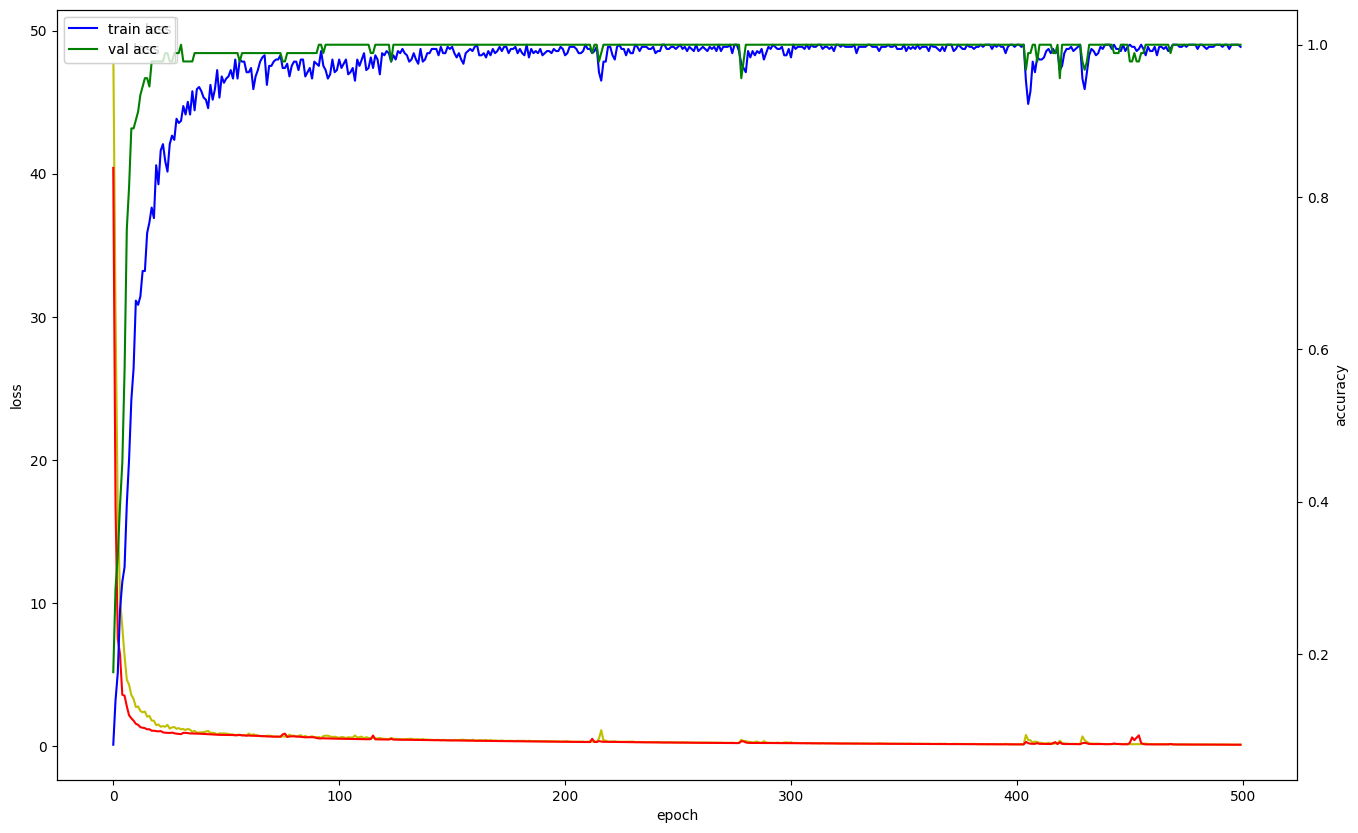

In [17]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

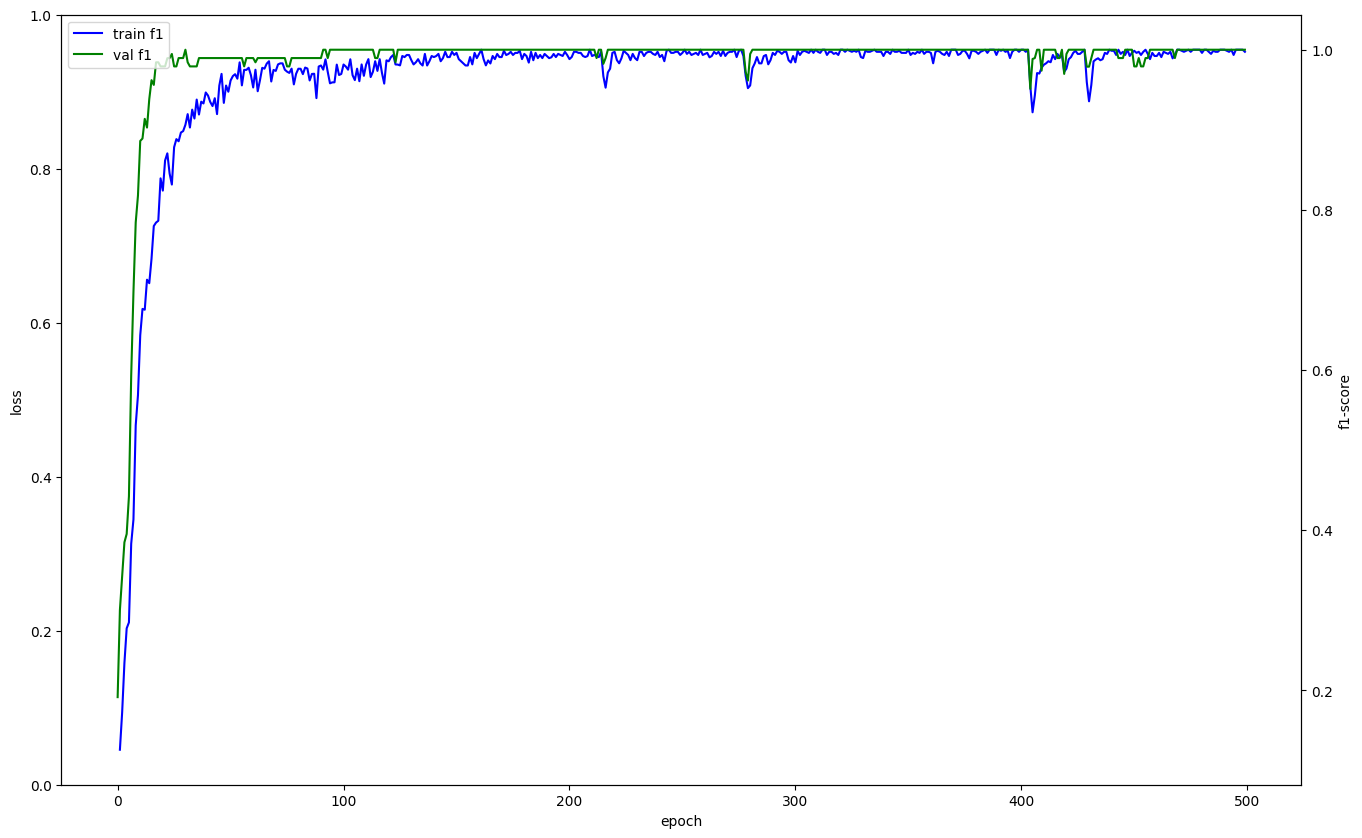

In [18]:
fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.plot(history.history['metric_f1score'], 'b', label='train f1')
acc_ax.plot(history.history['val_metric_f1score'], 'g', label='val f1')
acc_ax.set_ylabel('f1-score')
acc_ax.legend(loc='upper left')

plt.show()

In [19]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/multi_hand_gesture_classifier.h5', custom_objects = {'metric_F1score':metric_F1score})

y_pred = model.predict(x_val)
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[[82,  0],
        [ 0,  9]],

       [[87,  0],
        [ 0,  4]],

       [[80,  0],
        [ 0, 11]],

       [[83,  0],
        [ 0,  8]],

       [[84,  0],
        [ 0,  7]],

       [[84,  0],
        [ 0,  7]],

       [[71,  0],
        [ 0, 20]],

       [[81,  0],
        [ 0, 10]],

       [[84,  0],
        [ 0,  7]],

       [[83,  0],
        [ 0,  8]]])

In [20]:
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[82,  0],
        [ 0,  9]],

       [[87,  0],
        [ 0,  4]],

       [[80,  0],
        [ 0, 11]],

       [[83,  0],
        [ 0,  8]],

       [[84,  0],
        [ 0,  7]],

       [[84,  0],
        [ 0,  7]],

       [[71,  0],
        [ 0, 20]],

       [[81,  0],
        [ 0, 10]],

       [[84,  0],
        [ 0,  7]],

       [[83,  0],
        [ 0,  8]]])

In [21]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/multi_hand_gesture_classifier.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[[82,  0],
        [ 0,  9]],

       [[87,  0],
        [ 0,  4]],

       [[80,  0],
        [ 0, 11]],

       [[83,  0],
        [ 0,  8]],

       [[84,  0],
        [ 0,  7]],

       [[84,  0],
        [ 0,  7]],

       [[71,  0],
        [ 0, 20]],

       [[81,  0],
        [ 0, 10]],

       [[84,  0],
        [ 0,  7]],

       [[83,  0],
        [ 0,  8]]])

In [22]:
import tensorflow as tf
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# 1. TF Lite 기본 연산 + Select TF ops 사용
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]

# 2. TensorList lowering 비활성화
converter._experimental_lower_tensor_list_ops = False

# 변환 실행
tflite_model = converter.convert()

# 모델 저장
with open('models/multi_hand_gesture_classifier.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpshvqmci_/assets


INFO:tensorflow:Assets written to: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpshvqmci_/assets


Saved artifact at '/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpshvqmci_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10, 55), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  12898897584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12898834512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12898909376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6441414576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6441412112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6441591280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6441588816: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1744850949.420366  741988 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1744850949.420384  741988 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-17 09:49:09.420715: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpshvqmci_
2025-04-17 09:49:09.421323: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-17 09:49:09.421330: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpshvqmci_
I0000 00:00:1744850949.427699  741988 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-04-17 09:49:09.428660: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-17 09:49:09.461320: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder